### Imports:

In [1]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display
import sklearn.preprocessing
import numpy as np
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import GRU, Dense, Bidirectional, Flatten, Dropout
from keras.models import Sequential
import keras
import tensorflow as tf
from tensorflow.keras import Input, Model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import confusion_matrix
import itertools

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score




### Definitions:


In [67]:
csv_path = r'C:\Users\Admin\Desktop\Meenakshi-Vignesh\UrbanSound8K\metadata\UrbanSound8K.csv'
sample_audio_path = r'C:\\Users\\Admin\\Desktop\\Meenakshi-Vignesh\\UrbanSound8K\\audio\\fold1\\7061-6-0-0.wav'
Directory = r"C:\Users\Admin\Desktop\Meenakshi-Vignesh\UrbanSound8K"
extraction_filepath = "C:\\Users\\Admin\Desktop\\Meenakshi-Vignesh\\UrbanSound8K\\audio\\fold"

#Testing filepaths: Un-command only one filename
filename = 'C:\\Users\\Admin\\Desktop\\Meenakshi-Vignesh\\UrbanSound8K\\audio\\fold2\\174293-6-0-0.wav'

# filename = 'C:\\Users\\Admin\\Desktop\\Meenakshi-Vignesh\\UrbanSound8K\\audioTest\\Dog-bark.wav'

# filename = 'C:\\Users\\Admin\\Desktop\\Meenakshi-Vignesh\\UrbanSound8K\\audioTest\\Car-horn.wav'

# filename = 'C:\\Users\\Admin\\Desktop\\Meenakshi-Vignesh\\UrbanSound8K\\audioTest\\School-yard-ambience.wav'

# filename = 'C:\\Users\\Admin\\Desktop\\Meenakshi-Vignesh\\UrbanSound8K\\audioTest\\Jackhammer-drilling-in-the-street.wav'




In [39]:
data = pd.read_csv(csv_path)
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,101415-3-0-2.wav,101415,1.000000,5.000000,1,1,3,dog_bark
1,101415-3-0-3.wav,101415,1.500000,5.500000,1,1,3,dog_bark
2,101415-3-0-8.wav,101415,4.000000,8.000000,1,1,3,dog_bark
3,102106-3-0-0.wav,102106,2.243852,3.884477,2,1,3,dog_bark
4,102305-6-0-0.wav,102305,0.000000,2.611610,1,1,6,gun_shot


In [40]:
data.shape

(8732, 8)

In [41]:
audio, sample_rate = librosa.load(sample_audio_path, res_type='kaiser_fast')

In [42]:
audio.shape

(49613,)

In [43]:
duration_of_audio = audio.shape[0] / sample_rate

In [44]:
audio

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.1766746e-05,
       2.1667565e-05, 0.0000000e+00], dtype=float32)

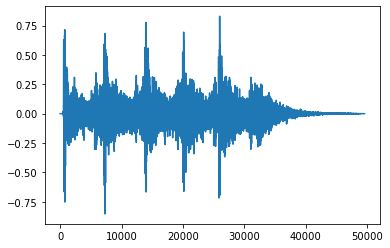

In [45]:
plt.plot(audio)

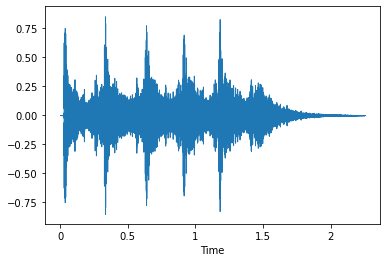

In [46]:
librosa.display.waveshow(y=audio, sr=sample_rate)

In [47]:
IPython.display.Audio(audio, rate=sample_rate)

In [48]:
sample_rate

22050

In [49]:
# mfcc = Mel Frequency Cepstral Coefficient 
feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)

In [50]:
feature

array([[-1.3529871e+02, -9.7589171e-01,  6.9904642e+00, ...,
        -5.6935345e+02, -5.9172760e+02, -6.1065784e+02],
       [ 4.1428520e+01,  3.5674881e+01,  2.3390150e+01, ...,
         4.3051235e+01,  2.5888077e+01,  1.2829887e+01],
       [-1.3863501e+01, -2.3906101e+01, -2.6899086e+01, ...,
        -1.1103733e+01, -7.5506554e+00,  2.0148960e-01],
       ...,
       [ 4.0615404e-01,  1.9946780e+00,  3.2819748e+00, ...,
        -2.9184837e+00, -2.3081627e+00,  1.0946956e+00],
       [ 6.7818511e-01,  1.0360668e+00,  4.1121095e-01, ...,
        -2.8531077e+00, -2.6576123e+00, -2.3330789e+00],
       [-2.5688404e-01,  2.5490522e+00,  3.6212564e+00, ...,
        -1.5571256e+00, -1.2634796e+00, -3.0191431e+00]], dtype=float32)

In [51]:
feature.shape

(50, 97)

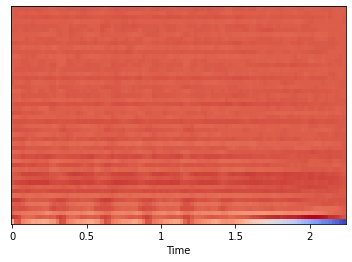

In [52]:
librosa.display.specshow(feature, sr=sample_rate, x_axis='time')

In [55]:
scaled_feature = sklearn.preprocessing.scale(feature, axis=1)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


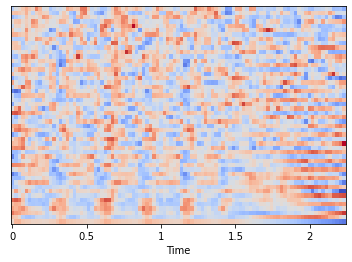

In [56]:
librosa.display.specshow(scaled_feature, sr=sample_rate, x_axis='time')

In [57]:

np.mean(scaled_feature.T, axis=0).shape

(50,)

In [59]:
r = tqdm(data.iterrows())

0it [00:00, ?it/s]

In [60]:
for i,r in tqdm(data.iterrows()):
    print(i,r)
    break


0it [00:00, ?it/s]
0it [00:00, ?it/s]

0 slice_file_name    101415-3-0-2.wav
fsID                         101415
start                           1.0
end                             5.0
salience                          1
fold                              1
classID                           3
class                      dog_bark
Name: 0, dtype: object


In [63]:
r = tqdm(data.iterrows())

0it [00:00, ?it/s]

In [64]:
#one row
for i,r in tqdm(data.iterrows()):
    print(i,r)
    print(r["class"])
    break


0it [00:00, ?it/s]
0it [00:00, ?it/s]

0 slice_file_name    101415-3-0-2.wav
fsID                         101415
start                           1.0
end                             5.0
salience                          1
fold                              1
classID                           3
class                      dog_bark
Name: 0, dtype: object
dog_bark


In [68]:
extracted_data = []
# print(os.path.abspath(Directory))
for index,row in tqdm(data.iterrows()):
    file_name =extraction_filepath + str(row["fold"])+"\\" +str(row["slice_file_name"])
    class_labels= row["class"]
    y,sr = librosa.load(file_name, res_type='kaiser_fast')
    feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50)
    scaled_feature = np.mean(feature.T,axis=0)
    extracted_data.append([scaled_feature, class_labels])

8732it [03:09, 46.01it/s]


In [69]:
np.array(extracted_data).shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_17564\3891064005.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(extracted_data).shape


(8732, 2)

In [70]:
feature_df = pd.DataFrame(extracted_data, columns=['feature','class'])

In [71]:
feature_df.head()

,feature,class
0,"[-403.45078, 93.77245, 17.812963, -11.735518, ...",dog_bark
1,"[-367.81476, 128.261, 29.322836, -21.599026, -...",dog_bark
2,"[-422.12054, 69.941666, 9.877, 0.09410775, 1.6...",dog_bark
3,"[-259.88644, 107.98114, -50.568455, -5.4745603...",dog_bark
4,"[-386.4985, 131.81609, 26.0077, 22.088737, -9....",gun_shot


In [72]:
feature_df['feature'].shape

(8732,)

In [73]:
feature_df['feature'][0][0]

-403.45078

In [74]:
feature_df['feature'][0]

array([-4.0345078e+02,  9.3772453e+01,  1.7812963e+01, -1.1735518e+01,
       -7.2203588e+00,  3.7652965e+00, -1.6174644e+01, -6.8593187e+00,
       -1.0542680e+01, -5.1888266e+00,  4.1709751e-02, -4.9357162e+00,
        9.3806326e-01,  1.2813917e+00,  4.6511507e-01,  6.1276870e+00,
        2.8408828e+00,  3.2279246e+00, -4.2884707e+00, -3.6228056e+00,
       -1.8678902e+00, -3.1442461e+00, -3.5220675e+00, -5.6707931e+00,
       -1.8247030e+00, -2.4657447e+00, -2.8244348e+00,  7.6615304e-02,
       -5.8698922e-01, -1.0786054e-01, -8.9683479e-01, -1.0526063e+00,
       -2.6228976e+00, -5.0490838e-01, -1.9731140e+00, -2.9963651e+00,
       -3.0717986e+00, -1.4866264e+00, -2.4471817e+00, -2.8644500e+00,
       -2.7617052e-02, -3.3050127e+00, -1.8047030e+00, -1.9129385e+00,
       -1.9338062e+00, -2.9534006e+00, -1.5298419e+00, -1.9710811e+00,
       -2.3286929e+00, -2.6107280e+00], dtype=float32)

In [75]:
feature_df['feature'][0].shape

(50,)

In [76]:
feature_df['feature'].shape

(8732,)

In [77]:
x = np.array(feature_df['feature'].tolist())

In [78]:
x.shape

(8732, 50)

In [79]:
x[0]

array([-4.0345078e+02,  9.3772453e+01,  1.7812963e+01, -1.1735518e+01,
       -7.2203588e+00,  3.7652965e+00, -1.6174644e+01, -6.8593187e+00,
       -1.0542680e+01, -5.1888266e+00,  4.1709751e-02, -4.9357162e+00,
        9.3806326e-01,  1.2813917e+00,  4.6511507e-01,  6.1276870e+00,
        2.8408828e+00,  3.2279246e+00, -4.2884707e+00, -3.6228056e+00,
       -1.8678902e+00, -3.1442461e+00, -3.5220675e+00, -5.6707931e+00,
       -1.8247030e+00, -2.4657447e+00, -2.8244348e+00,  7.6615304e-02,
       -5.8698922e-01, -1.0786054e-01, -8.9683479e-01, -1.0526063e+00,
       -2.6228976e+00, -5.0490838e-01, -1.9731140e+00, -2.9963651e+00,
       -3.0717986e+00, -1.4866264e+00, -2.4471817e+00, -2.8644500e+00,
       -2.7617052e-02, -3.3050127e+00, -1.8047030e+00, -1.9129385e+00,
       -1.9338062e+00, -2.9534006e+00, -1.5298419e+00, -1.9710811e+00,
       -2.3286929e+00, -2.6107280e+00], dtype=float32)

In [80]:
x[0][0]

-403.45078

In [81]:
target = np.array(feature_df['class'].tolist())

In [82]:
target

array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'drilling', 'drilling',
       'drilling'], dtype='<U16')

In [83]:
# from sklearn.model_selection import train_test_split

In [84]:
y_new = pd.get_dummies(target)
y_new.shape

(8732, 10)

In [85]:
y_new.head()

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y_new, test_size=0.2, random_state=11)

In [87]:
x_train.shape, x_test.shape

((6985, 50), (1747, 50))

In [88]:
x_train[0].shape

(50,)

In [89]:
np.array(x_train).reshape(6985,1,50)

array([[[-3.24987488e+02,  1.51579819e+02, -3.65348792e+00, ...,
         -1.68411660e+00, -6.79285347e-01,  5.79655230e-01]],

       [[-4.18100006e+02,  9.58975296e+01, -5.44968414e+01, ...,
         -1.47919691e+00, -4.83491707e+00, -6.76268339e+00]],

       [[-2.05064209e+02,  1.18301956e+02, -3.46444244e+01, ...,
         -2.90701598e-01, -5.09103119e-01, -2.24702859e+00]],

       ...,

       [[-2.31954102e+02,  9.85501404e+01, -3.10528870e+01, ...,
         -7.01113343e-01,  1.26707360e-01,  2.07500100e+00]],

       [[-2.32878891e+02,  1.67939697e+02, -2.08509846e+01, ...,
         -8.01810265e-01,  6.24385059e-01, -1.08742821e+00]],

       [[-1.71445755e+02,  2.48078117e+01, -3.11914749e+01, ...,
          6.41118526e-01, -2.36254287e+00, -1.01738203e+00]]],
      dtype=float32)

In [91]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,50)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(100, return_sequences=True, recurrent_dropout=0.1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 1, 200)           91200     
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                                 
Total params: 93,210
Trainable params: 93,210
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [93]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5,min_lr=0.00001)


In [94]:
history = model.fit(np.array(x_train).reshape(6985,1,50), np.array(y_train), epochs=200, validation_data=(np.array(x_test).reshape(1747,1,50),np.array(y_test)), batch_size=32, callbacks=[learning_rate_reduction])

Epoch 1/200
219/219 [==============================] - 4s 5ms/step - loss: 1.4931 - accuracy: 0.5018 - val_loss: 1.1722 - val_accuracy: 0.6153 - lr: 0.0010
Epoch 2/200
219/219 [==============================] - 1s 2ms/step - loss: 1.0303 - accuracy: 0.6885 - val_loss: 0.9484 - val_accuracy: 0.7058 - lr: 0.0010
Epoch 3/200
219/219 [==============================] - 1s 2ms/step - loss: 0.8525 - accuracy: 0.7463 - val_loss: 0.8215 - val_accuracy: 0.7487 - lr: 0.0010
Epoch 4/200
219/219 [==============================] - 1s 2ms/step - loss: 0.7250 - accuracy: 0.7845 - val_loss: 0.7183 - val_accuracy: 0.7985 - lr: 0.0010
Epoch 5/200
219/219 [==============================] - 1s 2ms/step - loss: 0.6398 - accuracy: 0.8150 - val_loss: 0.6437 - val_accuracy: 0.8191 - lr: 0.0010
Epoch 6/200
219/219 [==============================] - 1s 2ms/step - loss: 0.5704 - accuracy: 0.8324 - val_loss: 0.6302 - val_accuracy: 0.8134 - lr: 0.0010
Epoch 7/200
219/219 [==============================] - 1s 2ms/st

219/219 [==============================] - 1s 2ms/step - loss: 0.0562 - accuracy: 0.9920 - val_loss: 0.3091 - val_accuracy: 0.9044 - lr: 1.0000e-05
Epoch 46/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0561 - accuracy: 0.9921 - val_loss: 0.3094 - val_accuracy: 0.9044 - lr: 1.0000e-05
Epoch 47/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0560 - accuracy: 0.9923 - val_loss: 0.3092 - val_accuracy: 0.9044 - lr: 1.0000e-05
Epoch 48/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0559 - accuracy: 0.9923 - val_loss: 0.3095 - val_accuracy: 0.9044 - lr: 1.0000e-05
Epoch 49/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0558 - accuracy: 0.9923 - val_loss: 0.3094 - val_accuracy: 0.9044 - lr: 1.0000e-05
Epoch 50/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0557 - accuracy: 0.9920 - val_loss: 0.3096 - val_accuracy: 0.9044 - lr: 1.0000e-05
Epoch 51/200
219/219 [=========================

Epoch 96/200
219/219 [==============================] - 1s 3ms/step - loss: 0.0513 - accuracy: 0.9931 - val_loss: 0.3087 - val_accuracy: 0.9056 - lr: 1.0000e-05
Epoch 97/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0512 - accuracy: 0.9933 - val_loss: 0.3087 - val_accuracy: 0.9056 - lr: 1.0000e-05
Epoch 98/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0511 - accuracy: 0.9930 - val_loss: 0.3090 - val_accuracy: 0.9056 - lr: 1.0000e-05
Epoch 99/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0510 - accuracy: 0.9933 - val_loss: 0.3089 - val_accuracy: 0.9056 - lr: 1.0000e-05
Epoch 100/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0509 - accuracy: 0.9931 - val_loss: 0.3089 - val_accuracy: 0.9056 - lr: 1.0000e-05
Epoch 101/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0508 - accuracy: 0.9931 - val_loss: 0.3087 - val_accuracy: 0.9056 - lr: 1.0000e-05
Epoch 102/200
219/219 [=========

219/219 [==============================] - 1s 2ms/step - loss: 0.0469 - accuracy: 0.9943 - val_loss: 0.3092 - val_accuracy: 0.9056 - lr: 1.0000e-05
Epoch 147/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0468 - accuracy: 0.9948 - val_loss: 0.3093 - val_accuracy: 0.9056 - lr: 1.0000e-05
Epoch 148/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0467 - accuracy: 0.9947 - val_loss: 0.3091 - val_accuracy: 0.9061 - lr: 1.0000e-05
Epoch 149/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0466 - accuracy: 0.9951 - val_loss: 0.3094 - val_accuracy: 0.9056 - lr: 1.0000e-05
Epoch 150/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0465 - accuracy: 0.9947 - val_loss: 0.3091 - val_accuracy: 0.9056 - lr: 1.0000e-05
Epoch 151/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0464 - accuracy: 0.9950 - val_loss: 0.3089 - val_accuracy: 0.9056 - lr: 1.0000e-05
Epoch 152/200
219/219 [===================

Epoch 197/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0428 - accuracy: 0.9958 - val_loss: 0.3103 - val_accuracy: 0.9050 - lr: 1.0000e-05
Epoch 198/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0427 - accuracy: 0.9960 - val_loss: 0.3102 - val_accuracy: 0.9050 - lr: 1.0000e-05
Epoch 199/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0426 - accuracy: 0.9958 - val_loss: 0.3102 - val_accuracy: 0.9056 - lr: 1.0000e-05
Epoch 200/200
219/219 [==============================] - 1s 2ms/step - loss: 0.0425 - accuracy: 0.9957 - val_loss: 0.3098 - val_accuracy: 0.9050 - lr: 1.0000e-05


Text(0, 0.5, 'Accuracy')

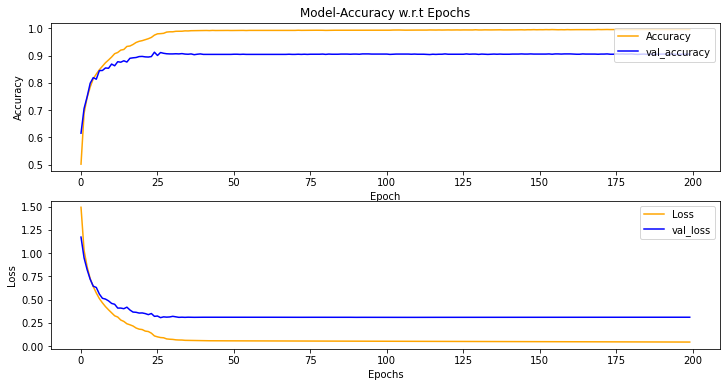

In [95]:
# visulize loss w.r.t epochs :
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,6))
ax2.plot(history.history['loss'], color='orange', label='Loss')
ax2.plot(history.history['val_loss'], color='blue', label='val_loss')
ax2.legend(loc='upper right')
ax1.plot(history.history['accuracy'], label='Accuracy', color='orange')
ax1.plot(history.history['val_accuracy'], label='val_accuracy', color='blue')
ax1.legend(loc="upper right")
ax1.set_title("Model-Accuracy w.r.t Epochs", loc='center')
plt.xlabel("Epochs")
plt.ylabel("Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")


In [96]:
y_pred = model.predict(np.array(x_test).reshape(1747, 1,50))

55/55 [==============================] - 1s 2ms/step


In [97]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [98]:
y_pred_classes

array([3, 5, 8, ..., 0, 8, 7], dtype=int64)

In [99]:
y_true = np.argmax(np.array(y_test), axis=1)

In [100]:
y_true

array([3, 5, 8, ..., 0, 8, 7], dtype=int64)

In [101]:
np.mean(y_pred_classes == y_true)

0.9049799656554093

Text(0.5, 13.421126458070283, 'Predicted Label')

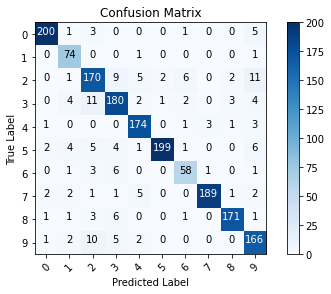

In [102]:
# from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_classes, y_true)
# import itertools
plt.imshow(cm, cmap = plt.cm.Blues, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(range(10)))
plt.xticks(tick_marks, range(10), rotation=45)
plt.yticks(tick_marks, range(10))
thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i , cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

In [104]:
# Decision Tree Classifier

# instantiate
dtc = DecisionTreeClassifier()

# fit
dtc.fit(x_train, y_train)

# predict
y_pred = dtc.predict(x_test)

# f1 score
score = f1_score(y_pred, y_test, pos_label='positive',average='micro')

# print
print (50*"-")
print("PERFORMANCE MEASURES : ")
print (" F1 SCORE: {:.3f}".format(score))
acc = sklearn.metrics.accuracy_score(y_true, y_pred_classes)
print(" ACCURACY : {:.3f}".format(acc))
precision = sklearn.metrics.precision_score(y_true, y_pred_classes, pos_label="positive",average="micro")
print(" PRECISION : {:.3f}".format(precision))
recall = sklearn.metrics.recall_score(y_true, y_pred_classes, pos_label="positive",average='micro')
print(" RECALL: {:.3f}".format(recall))

--------------------------------------------------
PERFORMANCE MEASURES : 
 F1 SCORE: 0.710
 ACCURACY : 0.905
 PRECISION : 0.905
 RECALL: 0.905


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [105]:
"""
Audio Converter [Mp3 to WAV] : https://online-audio-converter.com/ 
Audio Testing
1. [DOG BARK] , Link : https://orangefreesounds.com/dog-bark/#google_vignette 
2. [CAR HORN] , Link : https://orangefreesounds.com/car-horn-sound-kids-toy/ 
3. [Children Playing] , Link : https://orangefreesounds.com/school-yard-ambience/ 
4. [Drilling] , Link : https://orangefreesounds.com/jackhammer-drilling-in-the-street/ 
"""

'\nAudio Converter [Mp3 to WAV] : https://online-audio-converter.com/ \nAudio Testing\n1. [DOG BARK] , Link : https://orangefreesounds.com/dog-bark/#google_vignette \n2. [CAR HORN] , Link : https://orangefreesounds.com/car-horn-sound-kids-toy/ \n3. [Children Playing] , Link : https://orangefreesounds.com/school-yard-ambience/ \n4. [Drilling] , Link : https://orangefreesounds.com/jackhammer-drilling-in-the-street/ \n'

In [109]:
audio, sample_rate =  librosa.load(filename, res_type='kaiser_fast')
feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)
scaled_feature = np.mean(feature.T, axis=0)
prediction_feature = np.array(scaled_feature)
pred_vector = model.predict(prediction_feature.reshape(1,1,50))
pred_class = np.argmax(pred_vector)
print("Predicted Class is :", y_new.columns[pred_class])

1/1 [==============================] - 0s 14ms/step
Predicted Class is : gun_shot


In [110]:
IPython.display.Audio(audio, rate=sample_rate)